In [ ]:
!wget -O sam_vit_h_4b8939.pth https://huggingface.co/spaces/abhishek/StableSAM/resolve/main/sam_vit_h_4b8939.pth?download=true

--2024-09-06 10:54:35--  https://huggingface.co/spaces/abhishek/StableSAM/resolve/main/sam_vit_h_4b8939.pth?download=true
Resolving huggingface.co (huggingface.co)... 3.165.160.59, 3.165.160.11, 3.165.160.61, ...
Connecting to huggingface.co (huggingface.co)|3.165.160.59|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/47/d3/47d331d77ce5639cc128df17410f4744b11342191e8442f5cde65f20735d01f9/a7bf3b02f3ebf1267aba913ff637d9a2d5c33d3173bb679e46d9f338c26f262e?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27sam_vit_h_4b8939.pth%3B+filename%3D%22sam_vit_h_4b8939.pth%22%3B&Expires=1725879275&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNTg3OTI3NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy80Ny9kMy80N2QzMzFkNzdjZTU2MzljYzEyOGRmMTc0MTBmNDc0NGIxMTM0MjE5MWU4NDQyZjVjZGU2NWYyMDczNWQwMWY5L2E3YmYzYjAyZjNlYmYxMjY3YWJhOTEzZmY2MzdkOWEyZDVjMzNkMzE3M2JiNjc

In [ ]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-499mqfd0
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-499mqfd0
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 526fd066dea338ba2ca08886853bd37ffd6a8aec
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=8a0d950a8d8f7974cfbe19e6417731453497974881644d2db9b24c02851eebd4
  Stored in directory: /tmp/pip-ephem-wheel-cache-di1uj8ml/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [ ]:
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading the SAM model
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"  # Using the highest performance model variant

In [ ]:
# Load the pre-trained SAM model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [ ]:
# Automatic mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
# Load the input image
input_image_path = "/content/original image.jpg"  # Path to the original image
image = Image.open(input_image_path)
image_np = np.array(image)

In [ ]:
# Generate masks for the image
masks = mask_generator.generate(image_np)

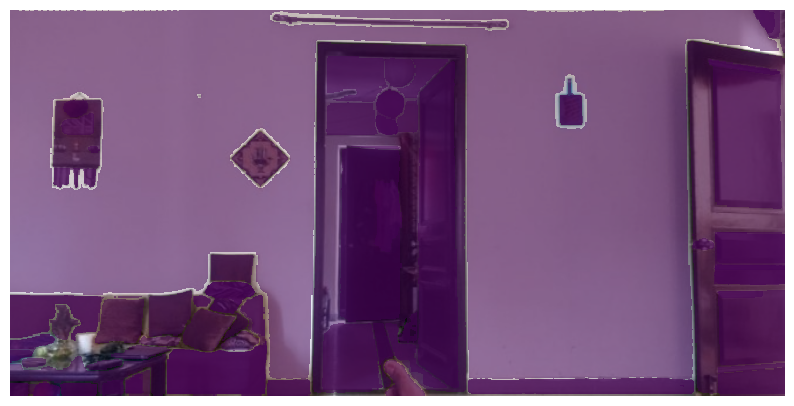

In [ ]:
# Display the masks overlaid on the original image
plt.figure(figsize=(10, 10))
plt.imshow(image_np)

for mask in masks:
  show_mask = mask["segmentation"]
  plt.imshow(np.ma.masked_where(show_mask == 0, show_mask), alpha=0.5)  # Overlay mask with transparency

plt.axis('off')
plt.show()

In [ ]:
# Find the largest mask
largest_mask = max(masks, key=lambda x: np.sum(x["segmentation"]))

In [ ]:
# Create the rainbow wavy pattern
def create_rainbow_waves(image_size):
    pattern = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)

    colors = [
        (255, 0, 0),    # Red
        (255, 165, 0),  # Orange
        (255, 255, 0),  # Yellow
        (0, 128, 0),    # Green
        (0, 0, 255),    # Blue
        (75, 0, 130),   # Indigo
        (238, 130, 238) # Violet
    ]

    num_waves = len(colors)  # Number of waves to match the colors
    wave_height = image_size[0] // num_waves
    for i in range(num_waves):
        y_start = i * wave_height
        y_end = (i + 1) * wave_height
        pattern[y_start:y_end, :] = colors[i % len(colors)]

    for i in range(image_size[0]):
        shift = int(20 * np.sin(i / 20.0))  # Simple sine wave for waviness
        pattern[i] = np.roll(pattern[i], shift, axis=0)

    return pattern

In [ ]:
# Create the pattern for the wall size
wall_pattern = create_rainbow_waves(image_np.shape[:2])

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[238, 130, 238],
        [238, 130, 238],
        [238, 130, 238],
        ...,
        [238, 130, 238],
        [238, 130, 238],
        [238, 130, 238]],

       [[238, 130, 238],
        [238, 130, 238],
        [238, 130, 238],
        ...,
        [238, 130, 238],
        [238, 130, 238],
        [238, 130, 238]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
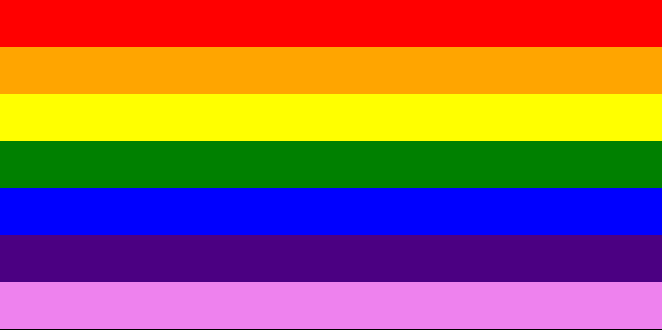

In [ ]:
wall_pattern

In [ ]:
# Apply the pattern to the largest mask
output_image = image_np.copy()
mask_segmentation = largest_mask["segmentation"]

array([[[201, 191, 190],
        [200, 190, 189],
        [200, 190, 189],
        ...,
        [108,  96,  96],
        [103,  93,  92],
        [ 96,  86,  85]],

       [[201, 191, 190],
        [201, 191, 190],
        [200, 190, 189],
        ...,
        [123, 111, 111],
        [128, 118, 117],
        [125, 115, 114]],

       [[202, 192, 191],
        [201, 191, 190],
        [201, 191, 190],
        ...,
        [131, 119, 119],
        [106,  96,  95],
        [ 91,  81,  80]],

       ...,

       [[ 42,  24,  40],
        [ 41,  23,  39],
        [ 43,  25,  39],
        ...,
        [127, 108,  94],
        [129, 110,  96],
        [129, 110,  96]],

       [[ 44,  23,  40],
        [ 40,  19,  36],
        [ 45,  24,  39],
        ...,
        [125, 107,  93],
        [130, 112,  98],
        [134, 116, 102]],

       [[ 46,  25,  42],
        [ 41,  20,  37],
        [ 46,  25,  40],
        ...,
        [119, 101,  87],
        [124, 106,  92],
        [129, 111,  97]]], dtype=uint8)
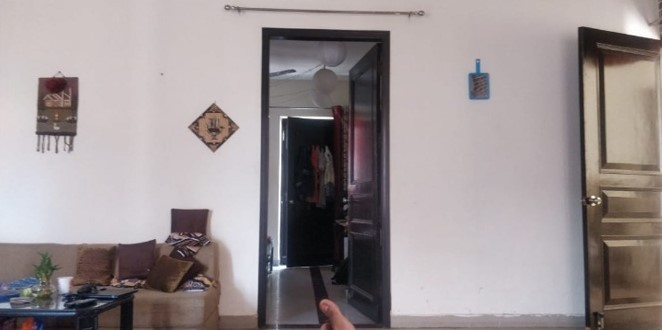

In [ ]:
output_image

In [ ]:
# Make sure the pattern and mask sizes match
for c in range(3):  # For each color channel
    output_image[:, :, c][mask_segmentation] = wall_pattern[:, :, c][mask_segmentation]

In [ ]:
# Save and display the result
output_image_path = "/content/processed_image.jpg"
Image.fromarray(output_image).save(output_image_path)

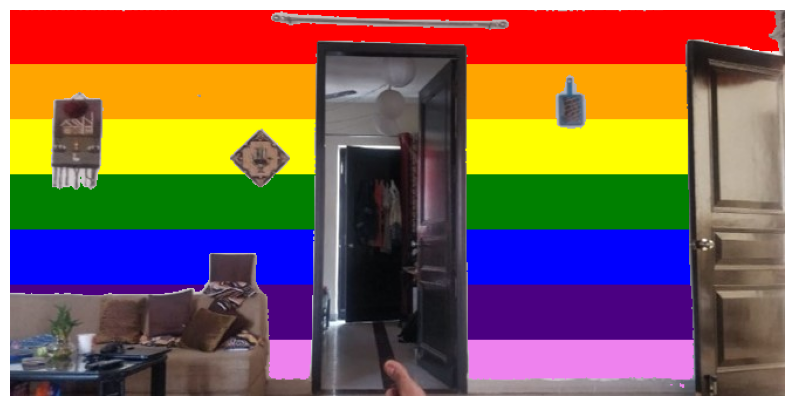

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()